**Importing file, as direct drag and drop was not working**

In [2]:
from google.colab import files


uploaded = files.upload()


Saving Churn_Modelling.csv to Churn_Modelling.csv


In [3]:
!pip install tensorflow

In [4]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [5]:
## import some basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [6]:
dataset = pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
## Divide the dataset into independent and dependent feature
# X = dataset.iloc[:, : -1]
## We don't require 'RowNumber', 'CustomerId', 'Surname' these columns.

## independent feature
X = dataset.iloc[:, 3:13]
X.head()

## dependent feature
y = dataset.iloc[:, -1]

In [8]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [9]:
## Feature Engineering

# Using drop_first to drop firat column, other two will rely the all other rows status as we have 3 columns in geography
geography = pd.get_dummies(X['Geography'], drop_first = True)
gender = pd.get_dummies(X['Gender'], drop_first = True)

In [10]:
# concatenate these variable in dataframe

X = X.drop(['Geography', 'Gender'], axis = 1)

In [11]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [12]:
X = pd.concat([X, geography, gender], axis=1)

In [13]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [14]:
# Splitting the dataset into train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [17]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [18]:
X_train.shape

(8000, 11)

In [27]:
## Part - 2 --> Now let's create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import  LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [28]:
## Let's initialize ANN
classifier = Sequential()

In [31]:
## Adding the input layer
classifier.add(Dense(units=11, activation='relu'))
## why units = 11, because the number of features are 11. see X_train.shape
## relu activation will be applied for the next layers

In [70]:
## Adding first hidden layer
classifier.add(Dense(units=7, activation='relu'))

## adding the Dropout
classifier.add(Dropout(0.20))

In [71]:
## Adding second hidden layer
classifier.add(Dense(units=6, activation='relu'))

## adding the Dropout
classifier.add(Dropout(0.30))

In [72]:
## Adding the output layer
classifier.add(Dense(1, activation='sigmoid'))

In [73]:
## Compiling the neural network

## by default the learning rate is 0.01, we could have write -> optimizer = 'adam'
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate = 0.01)
classifier.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [74]:
## Early stopping

## At a point the accuracy will be stagnant, then we require early stopping
## below code can be found from early stopping keras documentation
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [75]:
## Train the neural network
model_history = classifier.fit(X_train, y_train, validation_split = 0.33, batch_size = 10, epochs=1000, callbacks = early_stopping)

Epoch 1/1000
536/536 [==============================] - 8s 7ms/step - loss: 0.5197 - accuracy: 0.7970 - val_loss: 0.5079 - val_accuracy: 0.7955
Epoch 2/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4721 - accuracy: 0.7962 - val_loss: 0.4269 - val_accuracy: 0.7955
Epoch 3/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4526 - accuracy: 0.7962 - val_loss: 0.4299 - val_accuracy: 0.7955
Epoch 4/1000
536/536 [==============================] - 4s 8ms/step - loss: 0.4468 - accuracy: 0.7962 - val_loss: 0.4163 - val_accuracy: 0.7955
Epoch 5/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4481 - accuracy: 0.7962 - val_loss: 0.4133 - val_accuracy: 0.7955
Epoch 6/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.4435 - accuracy: 0.7962 - val_loss: 0.4173 - val_accuracy: 0.7955
Epoch 7/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.4449 - accuracy: 0.7962 - val_loss: 0.4098 - val_accuracy:

In [76]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

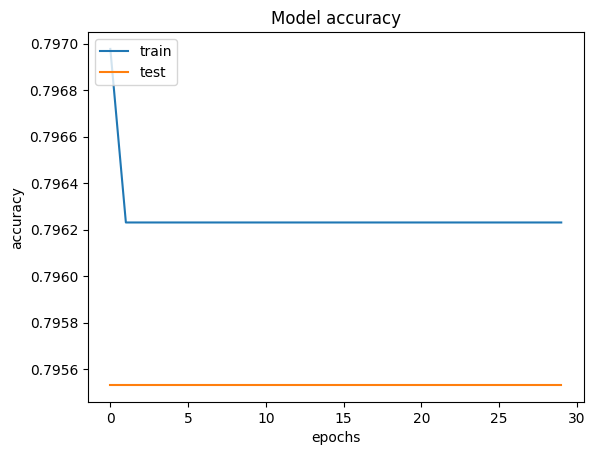

In [77]:
## Summarize history for accuracy

# plotting epochs vs accuracy graph
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

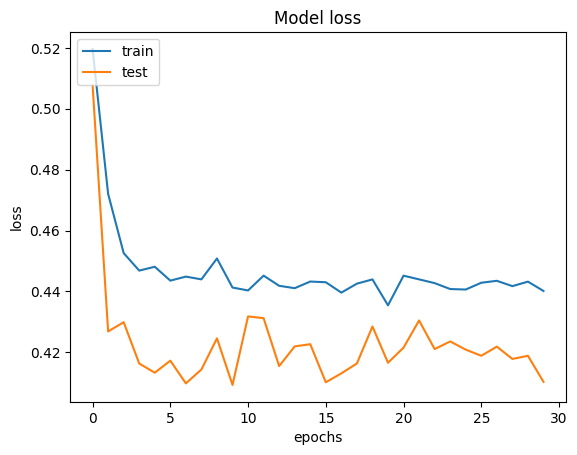

In [78]:
# plotting epochs vs loss graph
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [79]:
## Part-3 - Making the predictions and evaluating the model
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)
# If the value is >=0.5 then True(1) otherwise false(0)

63/63 [==============================] - 0s 2ms/step


In [80]:
## Making the confusion metrics
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1595,    0],
       [ 405,    0]])

In [81]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)

In [82]:
score

0.7975

In [83]:
## get the Weights
classifier.get_weights()

[array([[ 0.8280928 ,  0.23880218, -0.16611874, -3.2673452 ,  1.321893  ,
          2.2566445 , -0.49210194,  0.6752628 ,  0.7019757 ,  1.1382108 ,
          0.23445159],
        [-5.7581415 , -3.6284473 ,  3.3247483 , -3.9253397 , -5.618714  ,
         -2.8591952 , -0.6477211 , -5.854953  , -3.1566975 , -6.488134  ,
         -0.7176849 ],
        [ 4.3214207 , -1.5494273 ,  0.30788913,  1.9665835 , -1.6048864 ,
          1.680583  , -0.11673414,  0.04460536, -1.0784959 , -0.15056545,
         -1.9084684 ],
        [-0.6069122 , -2.7118301 ,  1.27105   ,  1.5447094 ,  1.5385993 ,
         -4.1167274 ,  0.76882833,  1.8025318 ,  1.4996343 ,  4.1954794 ,
          5.651668  ],
        [ 3.0739295 ,  6.1921077 ,  3.1269917 ,  2.4132924 ,  4.461216  ,
          3.0468938 ,  7.5042887 ,  4.2364593 ,  2.5820456 , -1.1511726 ,
          5.9232965 ],
        [-0.22661872,  1.136147  , -0.4998249 , -1.6687566 , -0.0346774 ,
         -1.2634425 ,  0.02986175,  0.23999755,  2.5574758 ,  1.0057765